# Fitting a line with PyTorch gradient descent

In [8]:
import torch
import matplotlib.pyplot as plt

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda:0


In [10]:
x = (torch.arange(50) + 1.0).to(device)
x

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
        29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
        43., 44., 45., 46., 47., 48., 49., 50.], device='cuda:0')

In [11]:
d = x + 2 * (torch.rand(50).to(device)) - 1
d

tensor([ 1.0819,  2.9455,  2.4072,  3.5759,  4.6655,  6.2310,  7.4823,  8.9287,
         8.1107, 10.6960, 10.1417, 11.2578, 12.4183, 13.2318, 15.1863, 16.9321,
        17.9175, 18.5716, 19.6625, 19.8840, 20.1367, 22.1560, 23.4502, 24.8756,
        24.3003, 25.5223, 26.6832, 27.9387, 29.6908, 30.4271, 30.0900, 31.5202,
        32.7021, 33.2170, 35.5513, 36.4228, 37.9042, 38.9447, 38.2052, 39.4336,
        41.0129, 42.9412, 43.3579, 43.0562, 44.3769, 45.1168, 47.8875, 48.4129,
        49.9601, 49.5340], device='cuda:0')

In [17]:
# Fit parameters points parameters a and b
# So that y = a * x + b fits the data (x,d) 

a = torch.tensor(5.0, requires_grad=True, device=device)
b = torch.tensor(1.0, requires_grad=True, device=device)

eta = 0.001

for t in range(100):
    y = a * x + b
    loss = torch.sum((y - d) * (y - d) / 50)
    
    loss.backward()
    
    with torch.no_grad():
        a -= eta * a.grad
        b -= eta * b.grad
        
        a.grad.zero_()
        b.grad.zero_()

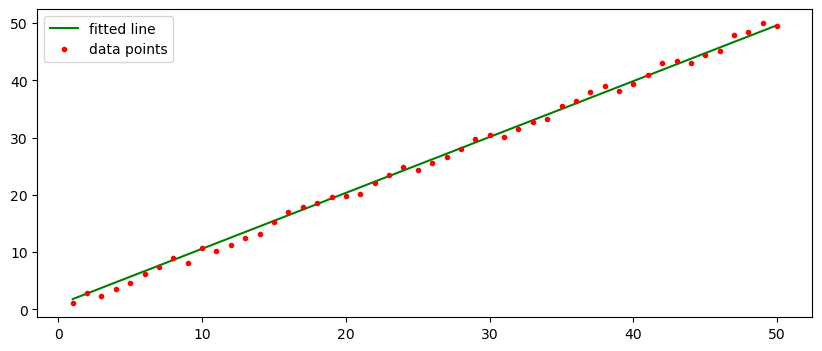

In [18]:
# Plot the results
plt.figure(figsize=(10,4))

plt.plot(x.detach().cpu(), y.detach().cpu(), 'g-', label='fitted line')
plt.plot(x.detach().cpu(), d.detach().cpu(), 'r.', label='data points')

plt.legend()
plt.show()